In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge,RidgeCV
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'baseball.csv')

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df.shape

(30, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values present in the data

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Exploratory Data Analysis

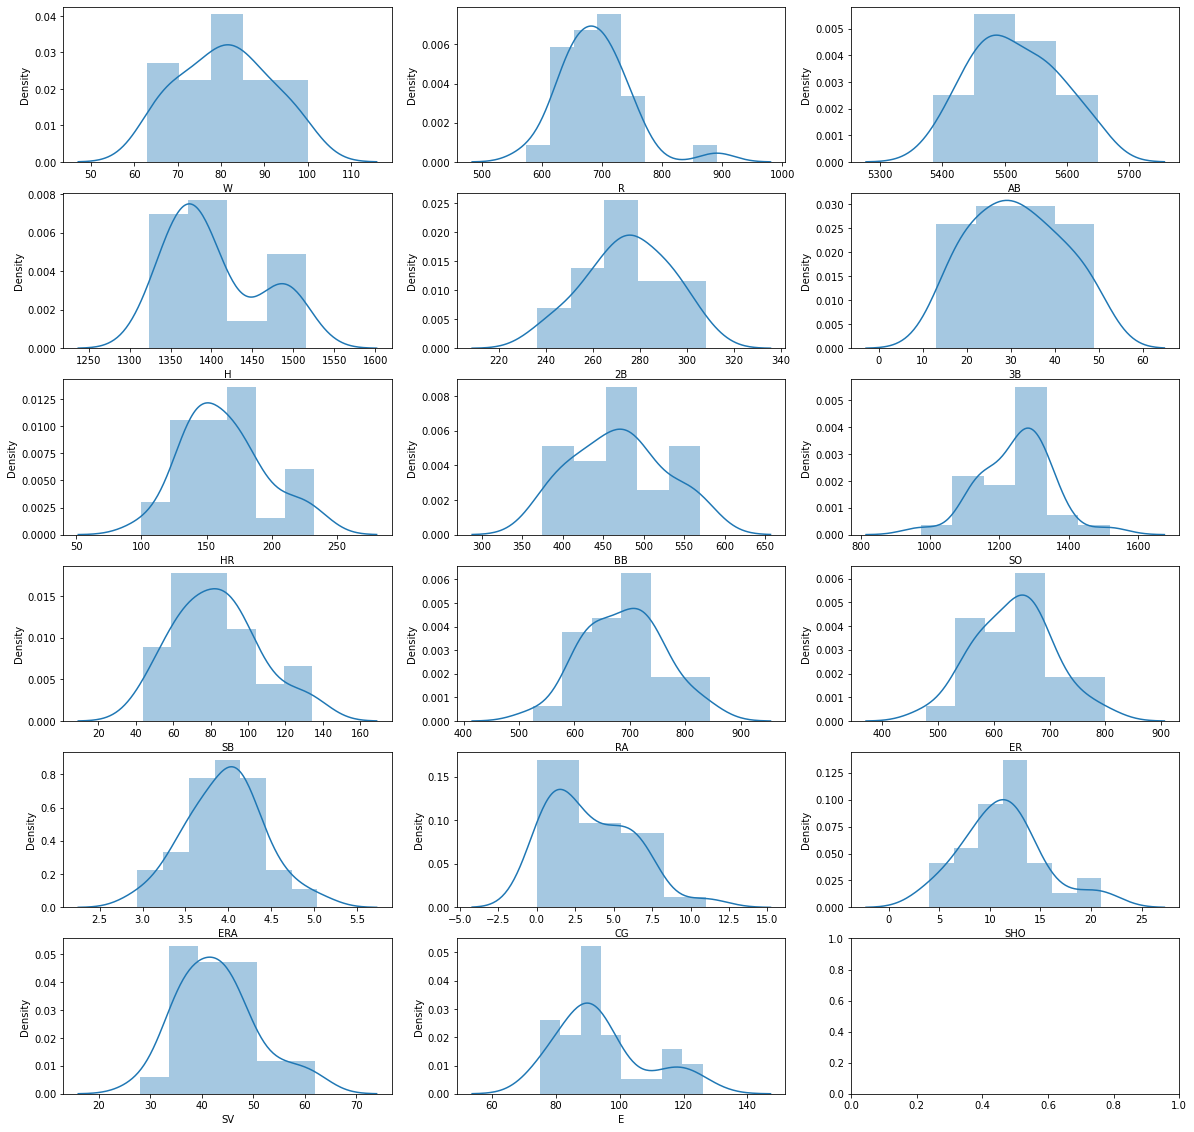

In [10]:
#create dist plot
fig, ax=plt.subplots(ncols=3,nrows=6,figsize=(20,20))
index=0
ax=ax.flatten()
for col, value in df.items():
        sns.distplot(df[col],ax=ax[index])
        index +=1

Few Columns are skewed and most of the columns are almost normally distributed

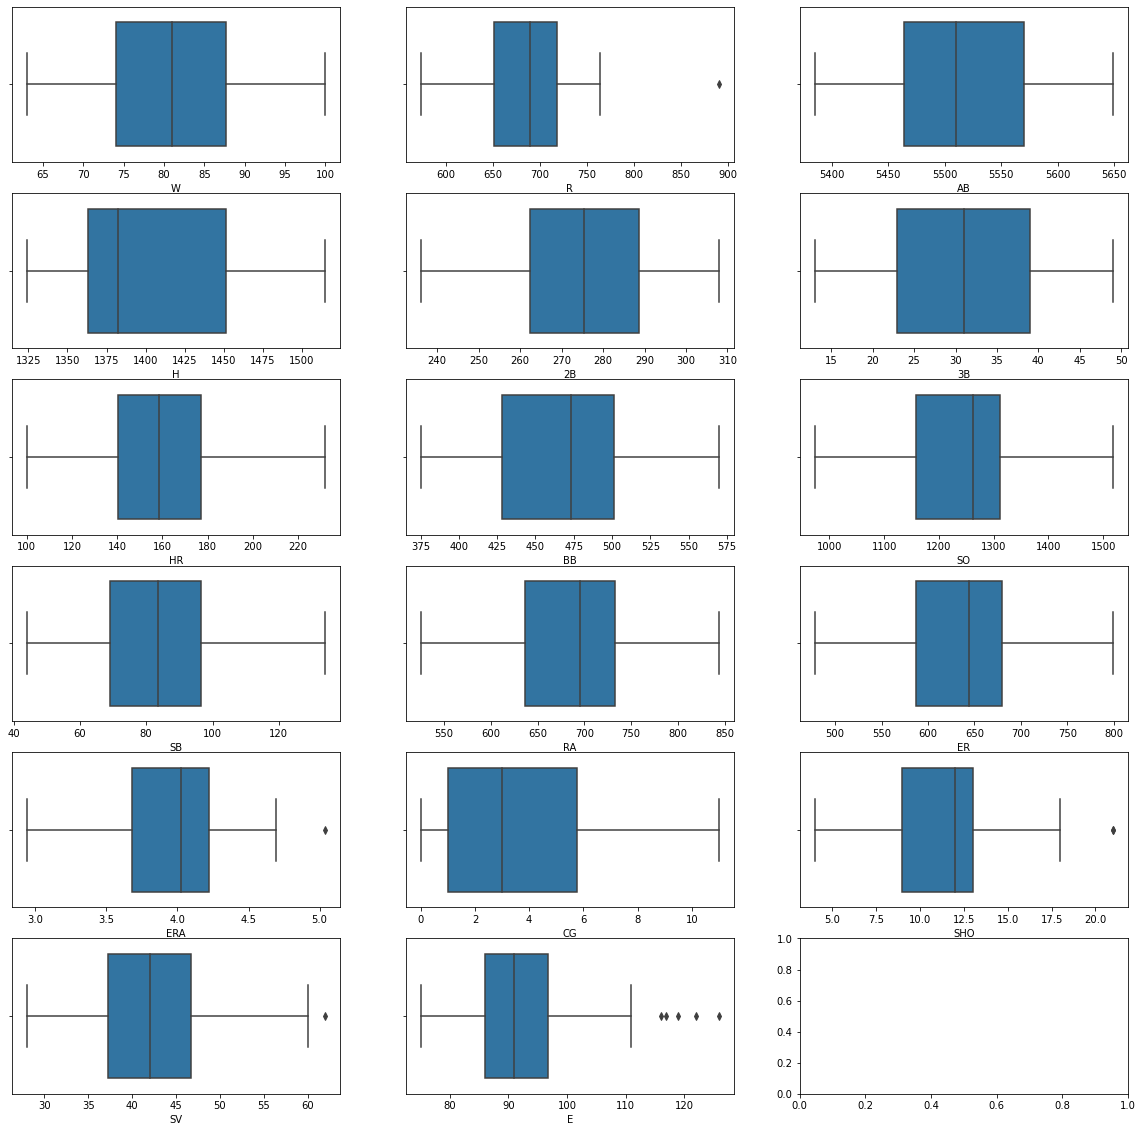

In [11]:
#create dist plot
fig, ax=plt.subplots(ncols=3,nrows=6,figsize=(20,20))
index=0
ax=ax.flatten()
for col, value in df.items():
        sns.boxplot(df[col],ax=ax[index])
        index +=1

There might be outliers in few columns like E,SV,ERA etc

# Checking the relationship of each columns with target column

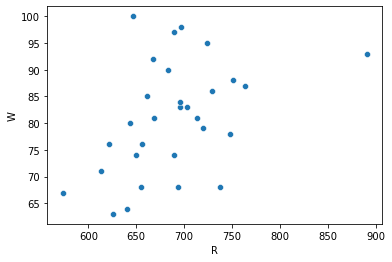

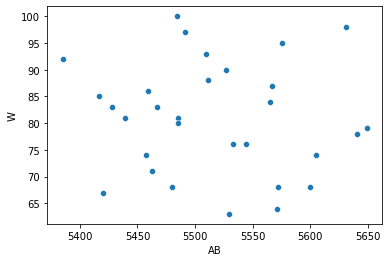

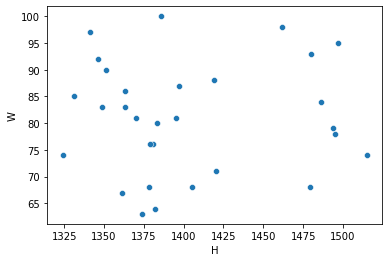

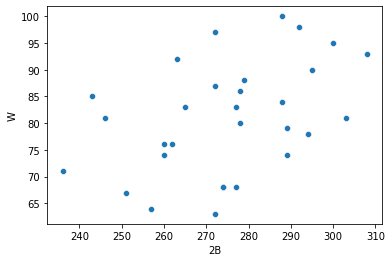

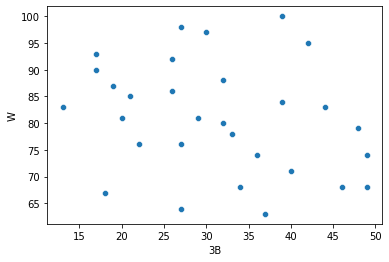

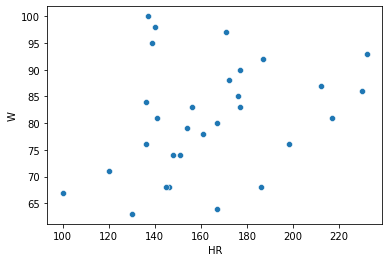

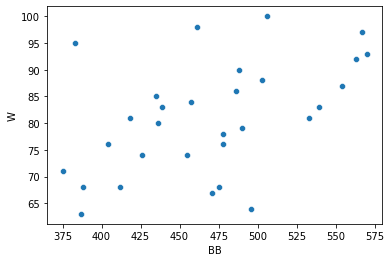

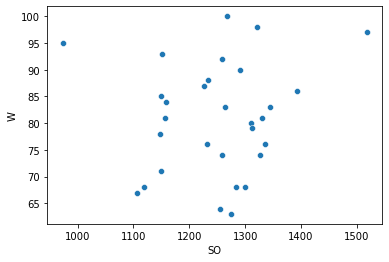

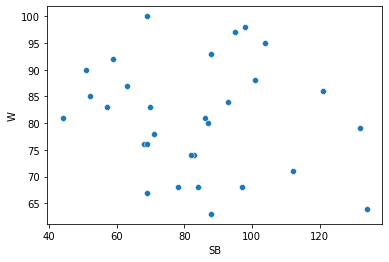

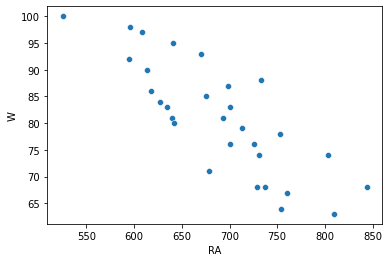

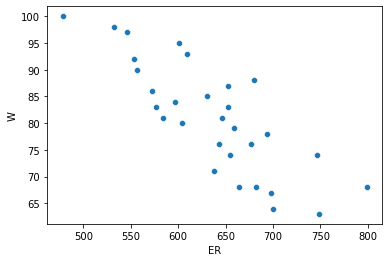

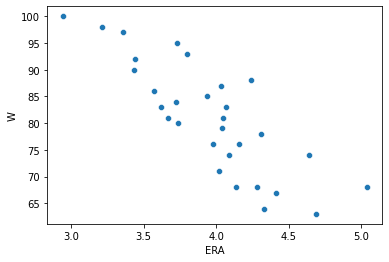

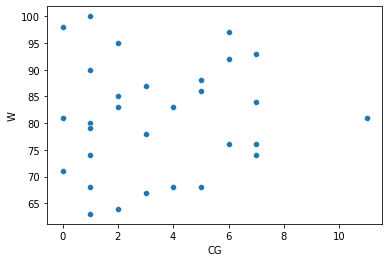

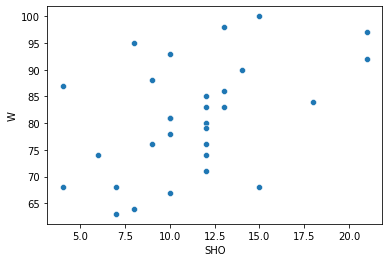

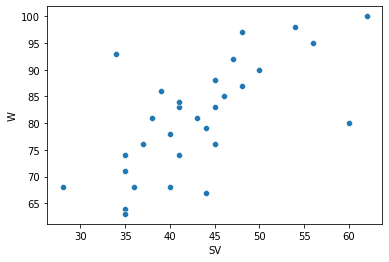

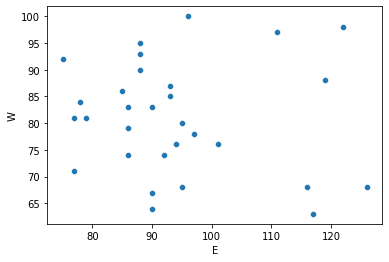

In [12]:
for i in df.columns:
    if i!='W':
        sns.scatterplot(x=df[i],y=df['W'])
        plt.show()

1. There is some positive relation between R and W.
2. W and HR also show positive relation.
3. W and 2B,W and BB,W and SO show positive relation.
4. No clear relationship between 3B and W,AB and W,H and W,W and SB,W and CG.
5. RA and W show negetive relationship.
6. ER and W,ERA and W show clear negetive relationship.

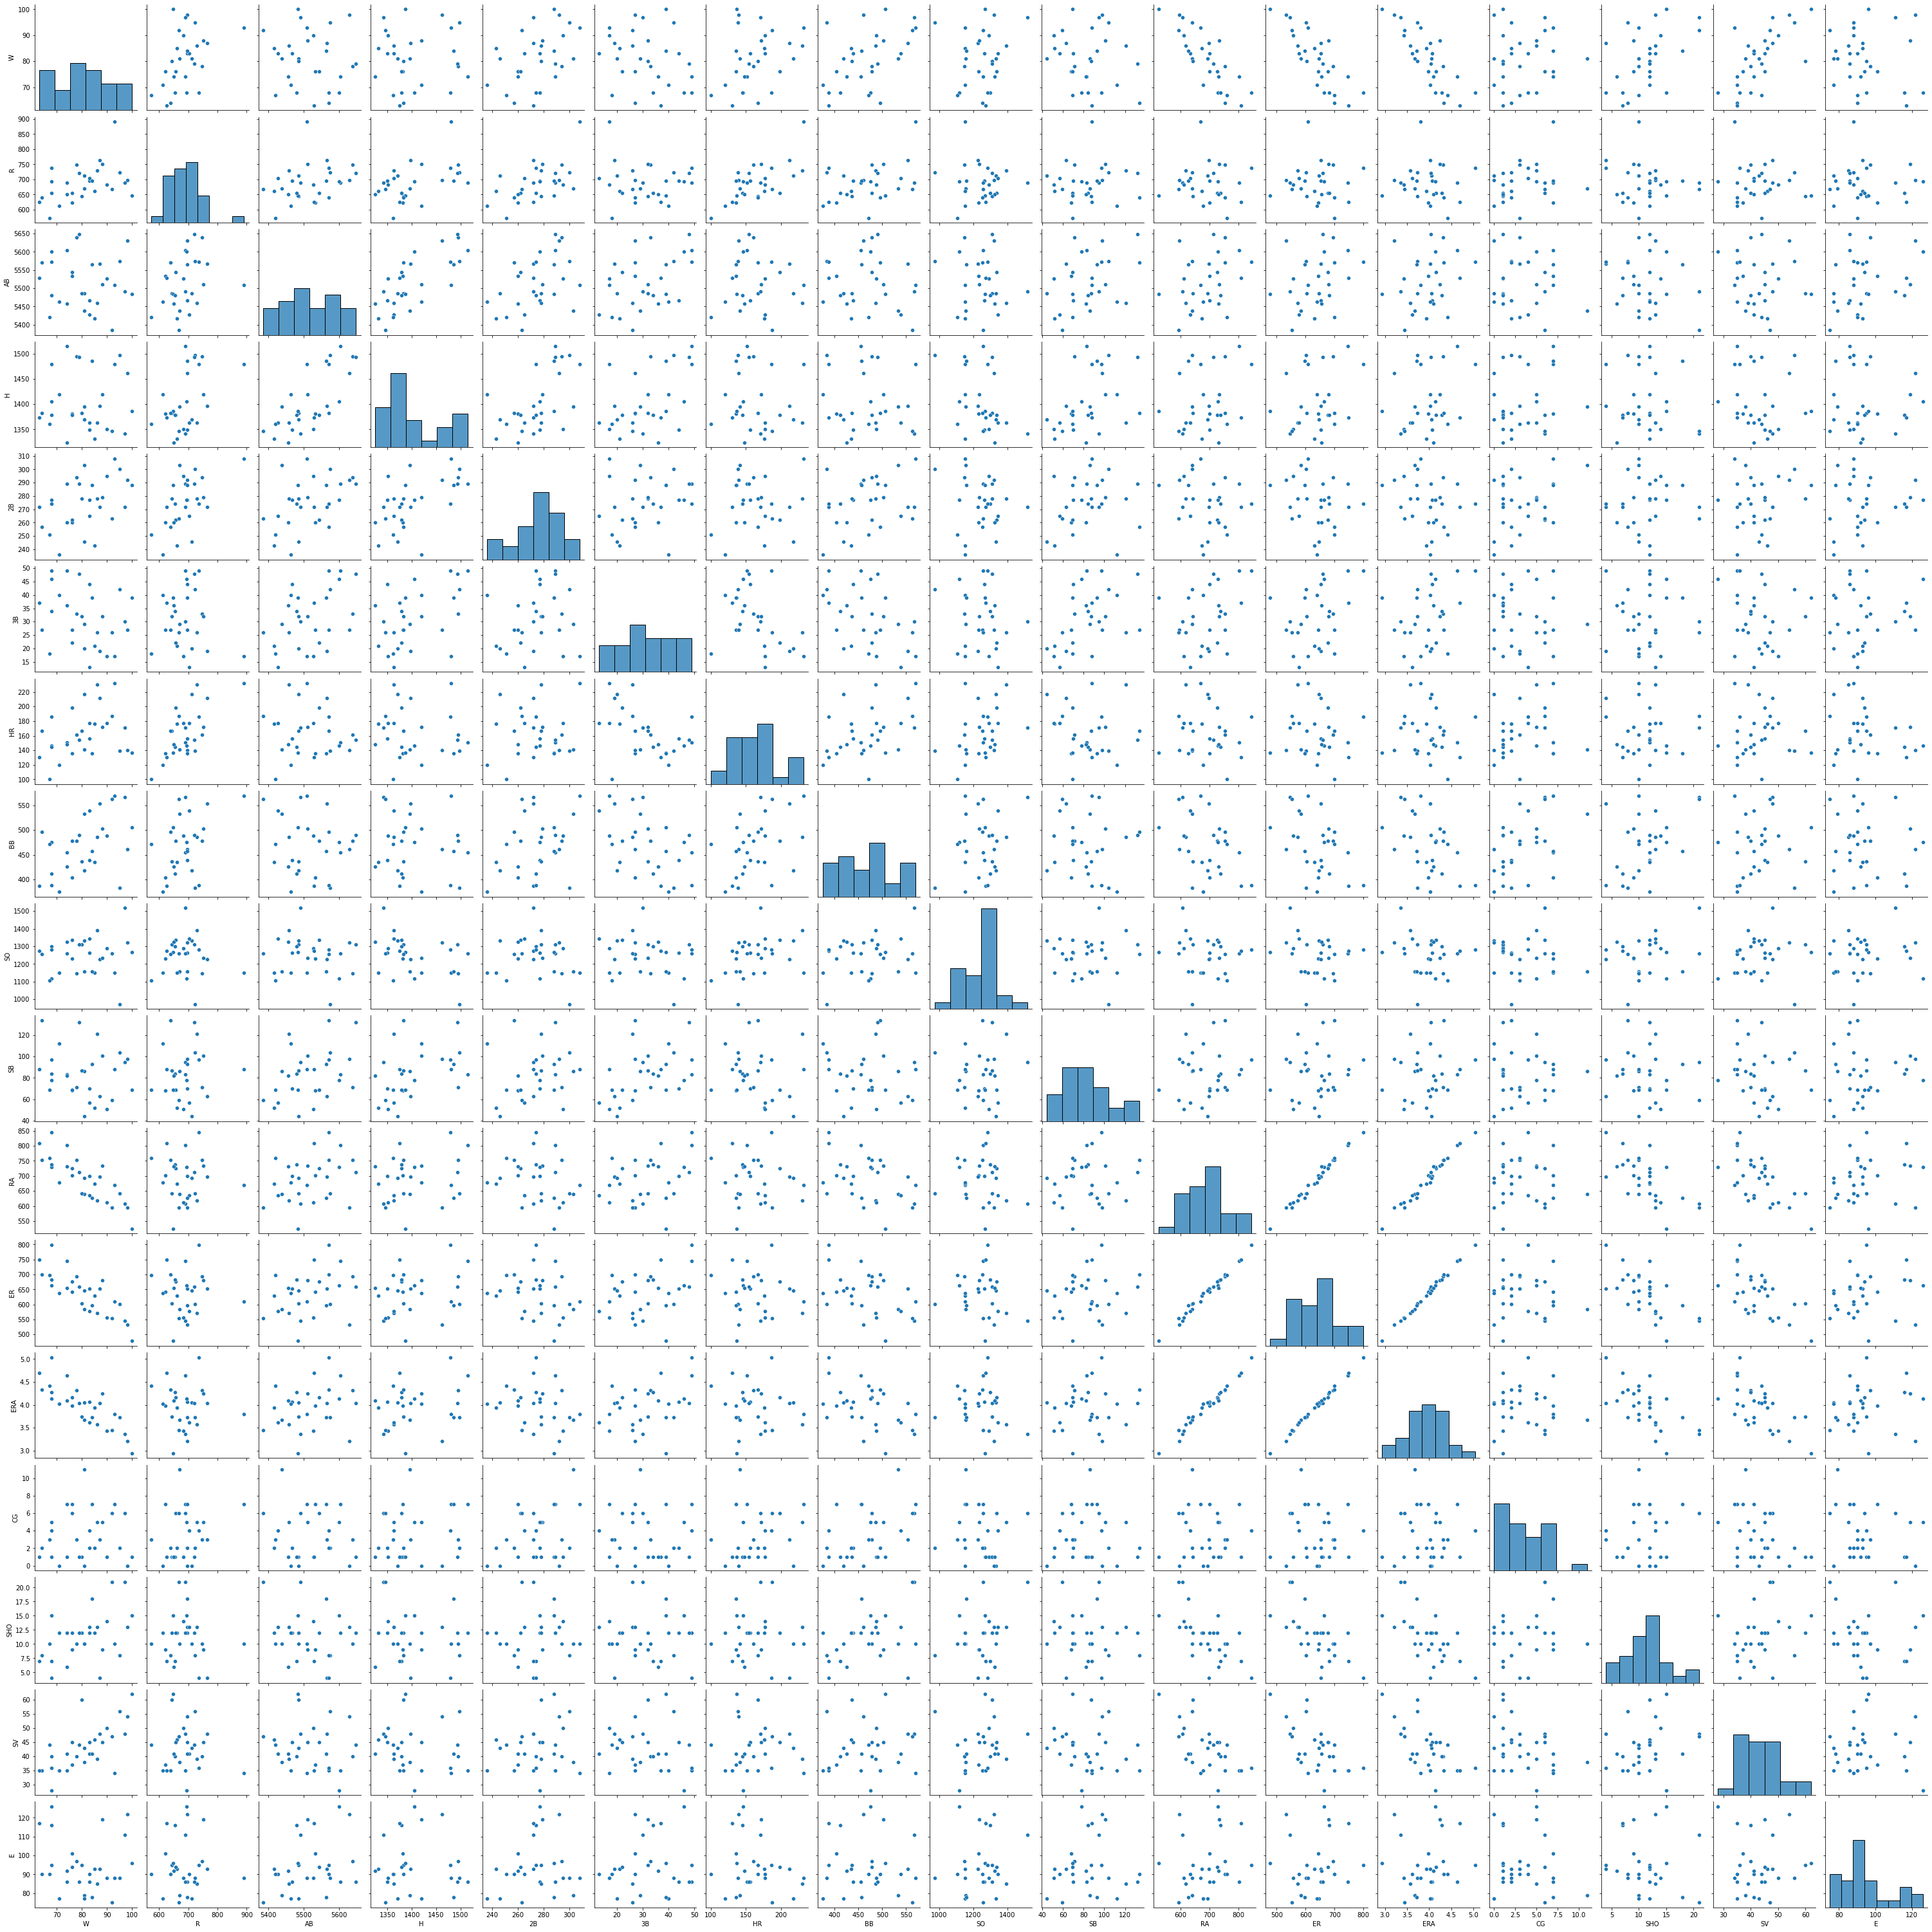

In [13]:
sns.pairplot(df)

# Checking Correlation

In [14]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

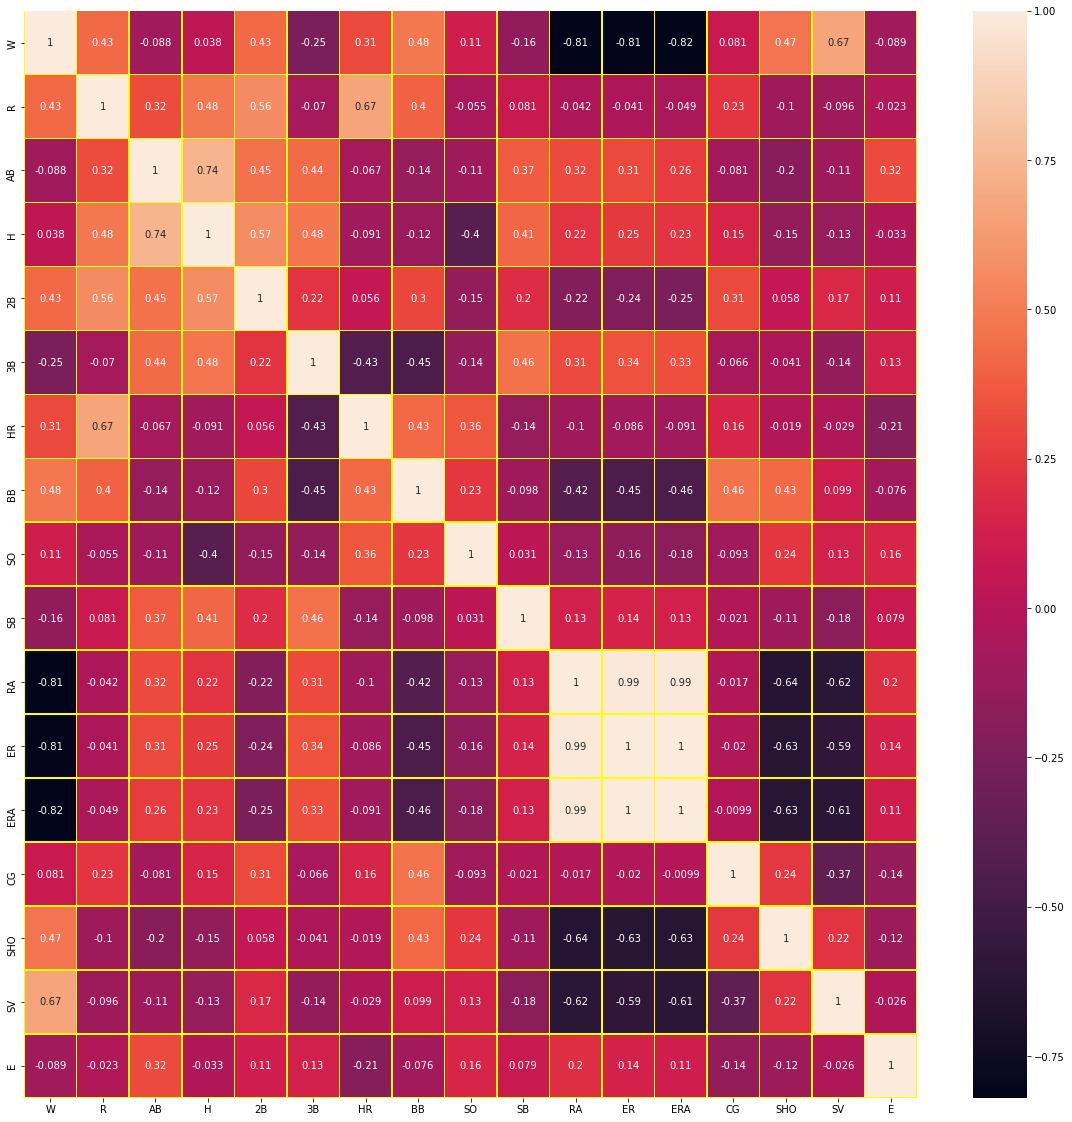

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='yellow')

1. From heatmap,we can see that ER,ERA and RA are strongly related with each other,with correlation value more than 98 percent.
2. ERA and W having very high negetive correlation of -0.82.
3. ER and W having very high negetive correlation of -0.81.
4. RA and W having very high negetive correlation of -0.81.



In [16]:
df.corr()['W'].sort_values(ascending=False).drop('W',axis=0)

SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

<AxesSubplot:>

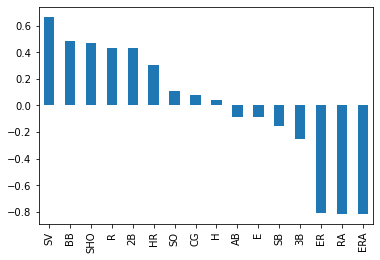

In [17]:
df.corr()['W'].sort_values(ascending=False).drop('W',axis=0).plot(kind='bar')

SV is highly positively corelated with target,ERA,ER,RA highly negetively corelated with target

we can drop column H as it is having very low correlation with target column 

# Data Preprocessing

## Using Zscore to remove outliers

In [18]:
z=np.abs(zscore(df))

In [19]:
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [20]:
df_new=df[(z<3).all(axis=1)]

In [21]:
df_new.shape

(29, 17)

In [22]:
df.shape

(30, 17)

In [23]:
#percentage data loss
(df.shape[0]-df_new.shape[0])*100/30

3.3333333333333335

there 3.33% data loss.

## Seperating Features and Label

In [24]:
x=df_new.iloc[:,1:]
y=df_new.iloc[:,0]

In [25]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [26]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

## Treating skewness

In [27]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [28]:
#dropping 'H' column as it is having very low corelation with target and also its skewed
x.drop('H',axis=1,inplace=True)

In [29]:
x_new=power_transform(x,method='yeo-johnson')

In [30]:
x=pd.DataFrame(x_new,columns=x.columns)

In [31]:
x.skew()

R     -0.024842
AB     0.081092
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Now we see that skewness is removed from all the columns

## Removing Multicollinearity problem

In [34]:
x.shape

(29, 15)

In [35]:
x.columns

Index(['R', 'AB', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG',
       'SHO', 'SV', 'E'],
      dtype='object')

In [36]:
#we using Variance inflation inflation factor
vif=pd.DataFrame()
vif['Variables']=x.columns
vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [37]:
vif

,Variables,VIF factor
0,R,6.203862
1,AB,11.822743
2,2B,3.501608
3,3B,3.010176
4,HR,7.782532
5,BB,3.304538
6,SO,2.987134
7,SB,2.082265
8,RA,221.601838
9,ER,2213.515644


In [39]:
# we can drop ER as it is having very high VIF
x.drop('ER',axis=1,inplace=True)

In [40]:
vif=pd.DataFrame()
vif['Variables']=x.columns
vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [41]:
vif

,Variables,VIF factor
0,R,4.065770
1,AB,3.204381
2,2B,3.079162
3,3B,2.918647
4,HR,4.632934
5,BB,3.282957
6,SO,2.761686
7,SB,1.875780
8,RA,121.312100
9,ERA,115.958325


In [42]:
#we see that RA and ERA are having very high VIF we can drop one of them
x.drop('RA',axis=1,inplace=True)

In [43]:
vif=pd.DataFrame()
vif['Variables']=x.columns
vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [44]:
vif

,Variables,VIF factor
0,R,3.900562
1,AB,2.450820
2,2B,3.055609
3,3B,2.899304
4,HR,4.363974
5,BB,2.718143
6,SO,2.247838
7,SB,1.735770
8,ERA,4.291568
9,CG,2.205988


Now all VIF is adjusted

# Feature Scaling

In [45]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

# Train test splitting and model training

In [57]:
models = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),XGBRegressor(),LinearRegression(),RandomForestRegressor(),SVR()]
max_r2_score = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,random_state =i,test_size = 0.20)
    for model in models:
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = r2_score(y_test,pred)
        print("R2 score correspond to random state " ,i ,"is", score)
        if score> max_r2_score:
            max_r2_score=score
            final_state =i
            final_model = model
            
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  1 is 0.6825775656324582
R2 score correspond to random state  1 is 0.6256324582338904
R2 score correspond to random state  1 is 0.75769656589764
R2 score correspond to random state  1 is 0.6532061366209603
R2 score correspond to random state  1 is 0.8006994733939947
R2 score correspond to random state  1 is 0.6960527446300717
R2 score correspond to random state  1 is 0.09314234228597773
R2 score correspond to random state  2 is -1.1227436823104693
R2 score correspond to random state  2 is -0.9255451263537919
R2 score correspond to random state  2 is -0.6698532871632406
R2 score correspond to random state  2 is -1.3211277602611124
R2 score correspond to random state  2 is 0.2735442829229685
R2 score correspond to random state  2 is -1.126363610108302
R2 score correspond to random state  2 is -3.1926639627625635
R2 score correspond to random state  3 is 0.6162564766839378
R2 score correspond to random state  3 is 0.6096113989637306
R2 score correspond 

R2 score correspond to random state  20 is 0.11758711996000493
R2 score correspond to random state  20 is 0.18682997779132748
R2 score correspond to random state  20 is 0.2720066468842737
R2 score correspond to random state  20 is -0.3752113916872859
R2 score correspond to random state  21 is -0.35619834710743814
R2 score correspond to random state  21 is 0.5410247933884296
R2 score correspond to random state  21 is -0.13553994490358123
R2 score correspond to random state  21 is -0.014289006200611354
R2 score correspond to random state  21 is 0.503914978022818
R2 score correspond to random state  21 is 0.2698089256198348
R2 score correspond to random state  21 is 0.09941047657610802
R2 score correspond to random state  22 is -0.6706392199349946
R2 score correspond to random state  22 is 0.11011917659804948
R2 score correspond to random state  22 is 0.2395915998135374
R2 score correspond to random state  22 is 0.2827023561817633
R2 score correspond to random state  22 is 0.6491915585440

R2 score correspond to random state  39 is 0.3590429447161426
R2 score correspond to random state  39 is 0.30519132193518705
R2 score correspond to random state  39 is 0.5247727933541014
R2 score correspond to random state  39 is 0.08848490548591126
R2 score correspond to random state  40 is -0.15284974093264259
R2 score correspond to random state  40 is -0.407875647668394
R2 score correspond to random state  40 is 0.04433279140671764
R2 score correspond to random state  40 is 0.07688790809707247
R2 score correspond to random state  40 is 0.429410174325482
R2 score correspond to random state  40 is 0.02221126943005136
R2 score correspond to random state  40 is -0.6106513373606883
R2 score correspond to random state  41 is 0.055276381909547756
R2 score correspond to random state  41 is 0.4021306532663321
R2 score correspond to random state  41 is 0.6387058750542836
R2 score correspond to random state  41 is 0.6118440814174702
R2 score correspond to random state  41 is 0.7387463192081696

R2 score correspond to random state  58 is -0.31055358350500417
R2 score correspond to random state  58 is 0.7552673738946734
R2 score correspond to random state  58 is 0.2796983061480556
R2 score correspond to random state  58 is -0.28440833386123043
R2 score correspond to random state  59 is -0.3651948051948053
R2 score correspond to random state  59 is 0.30555844155844136
R2 score correspond to random state  59 is 0.007857142857142785
R2 score correspond to random state  59 is 0.4553285492441992
R2 score correspond to random state  59 is 0.6613988734764211
R2 score correspond to random state  59 is 0.3118414545454544
R2 score correspond to random state  59 is -0.7163678579221868
R2 score correspond to random state  60 is -0.18837275577087498
R2 score correspond to random state  60 is 0.5985864918780281
R2 score correspond to random state  60 is 0.4784155029923055
R2 score correspond to random state  60 is 0.16414396940372467
R2 score correspond to random state  60 is 0.5312664822254

R2 score correspond to random state  77 is -0.3253951709193643
R2 score correspond to random state  77 is 0.5938060066757747
R2 score correspond to random state  77 is 0.36135625000000027
R2 score correspond to random state  77 is 0.1111836880996635
R2 score correspond to random state  78 is -0.07343124165554071
R2 score correspond to random state  78 is 0.39182910547396554
R2 score correspond to random state  78 is 0.6029273599367055
R2 score correspond to random state  78 is 0.5982833174956843
R2 score correspond to random state  78 is 0.8694365399053388
R2 score correspond to random state  78 is 0.5844639519359145
R2 score correspond to random state  78 is -0.2986225336443331
R2 score correspond to random state  79 is 0.33841795598169533
R2 score correspond to random state  79 is 0.5885116583133583
R2 score correspond to random state  79 is 0.722670153265054
R2 score correspond to random state  79 is 0.23393343851752824
R2 score correspond to random state  79 is 0.8049770033486032
R

R2 score correspond to random state  96 is 0.2749280686152852
R2 score correspond to random state  96 is 0.4861782900399034
R2 score correspond to random state  96 is 0.4720528150134051
R2 score correspond to random state  96 is -0.0409672048936236
R2 score correspond to random state  97 is 0.4236631986450521
R2 score correspond to random state  97 is 0.47859666102105003
R2 score correspond to random state  97 is 0.6820406846503421
R2 score correspond to random state  97 is 0.6471512708474382
R2 score correspond to random state  97 is 0.8350390607598155
R2 score correspond to random state  97 is 0.6895684490684731
R2 score correspond to random state  97 is -0.015357792621447208
R2 score correspond to random state  98 is -0.8853211009174309
R2 score correspond to random state  98 is 0.07748123436196841
R2 score correspond to random state  98 is -0.10598925108918533
R2 score correspond to random state  98 is -0.22927536687641714
R2 score correspond to random state  98 is 0.44990606906848

# Lasso Regression

In [73]:
from sklearn.linear_model import Lasso

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,random_state =47,test_size = 0.20)

In [102]:
lasso=Lasso(alpha= 0.1)

In [103]:
lasso.fit(x_train,y_train)
pred=lasso.predict(x_test)
r2_score(y_test,pred)*100

95.56202345826279

# Ridge Regression

In [81]:
from sklearn.linear_model import Ridge

In [104]:
ridge=Ridge(alpha= 0.1)

In [105]:
ridge.fit(x_train,y_train)
pred=lasso.predict(x_test)
r2_score(y_test,pred)*100

95.56202345826279

# Cross Validation

In [58]:
cvs1= cross_val_score(LinearRegression(),x_scaler,y,cv=5)
print("Cross Validation of Linear Regression model ",cvs1.mean())

Cross Validation of Linear Regression model  0.4361413114675695


In [59]:
cvs2= cross_val_score(DecisionTreeRegressor(),x_scaler,y,cv=5)
print("Cross Validation of Linear Regression model ",cvs2.mean())

Cross Validation of Linear Regression model  -2.2741495744966853


In [60]:
cvs3= cross_val_score(KNeighborsRegressor(),x_scaler,y,cv=5)
print("Cross Validation of Linear Regression model ",cvs3.mean())

Cross Validation of Linear Regression model  0.027546606157429855


In [61]:
cvs4= cross_val_score(AdaBoostRegressor(),x_scaler,y,cv=5)
print("Cross Validation of Linear Regression model ",cvs4.mean())

Cross Validation of Linear Regression model  -0.9106545042680858


In [62]:
cvs5= cross_val_score(XGBRegressor(),x_scaler,y,cv=5)
print("Cross Validation of Linear Regression model ",cvs5.mean())

Cross Validation of Linear Regression model  -1.0088512116782762


In [64]:
cvs6= cross_val_score(RandomForestRegressor(),x_scaler,y,cv=5)
print("Cross Validation of Linear Regression model ",cvs6.mean())

Cross Validation of Linear Regression model  -0.6518349103484032


In [66]:
cvs7= cross_val_score(SVR(),x_scaler,y,cv=5)
print("Cross Validation of Linear Regression model ",cvs7.mean())

Cross Validation of Linear Regression model  -0.3209306998168564


In [106]:
cvs8= cross_val_score(lasso,x_scaler,y,cv=5)
print("Cross Validation of Lasso Regression model ",cvs8.mean())

Cross Validation of Lasso Regression model  0.47149826060562017


In [107]:
cvs9= cross_val_score(ridge,x_scaler,y,cv=5)
print("Cross Validation of Ridge Regression model ",cvs9.mean())

Cross Validation of Ridge Regression model  0.443572518417141


From above we can see that lasso regression is giving best CV score 

# Hyper Parameter Tuning For Lasso Regression

In [108]:
lasso = Lasso()


In [109]:
parameters={'alpha':[0.01,0.1,.001,.0001],'max_iter':[1000,1500,2000],'random_state':range(1,100)}


In [110]:
gridsearch=GridSearchCV(lasso,parameters)


In [111]:
gridsearch.fit(x_train,y_train)


GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 0.001, 0.0001],
                         'max_iter': [1000, 1500, 2000],
                         'random_state': range(1, 100)})

In [112]:
gridsearch.best_params_

{'alpha': 0.1, 'max_iter': 1000, 'random_state': 1}

In [113]:
### Provinding best parameter to the model:-
lasso = Lasso(alpha = 0.1,max_iter=1000,random_state=1)
lasso.fit(x_train,y_train)
pred = lasso.predict(x_test)
score = r2_score(y_test,pred)
print("R2 Score :",score*100)

R2 Score : 95.56202345826279


In [114]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  2.185015120848547
Mean squared Error:  5.601712612681652
Root Mean Absolute Error:  1.4781796646039165


# Saving the Model

In [115]:
import pickle
filename ='baseball.pickle'
pickle.dump(lasso,open(filename,'wb'))
